In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
os.chdir('/content/drive/My Drive/ProyectoIA2/generative-spectral-datasets')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
from models.main import make_encoder, make_generator, make_discriminator, spectralGAN
from models.utils import discriminator_loss, autoencoder_loss
from models.metrics import PSNR, SSIM
from data import load_dataset
import scipy.io as sio
import matplotlib.pyplot as plt



input_shape = (512,512,31)

In [3]:
BATCH_SIZE = 1

train_params = dict(
    batch_size = BATCH_SIZE,
    shuffle = True,
    cache = True
)

test_params = dict(
    batch_size = BATCH_SIZE,
    cache = True
)

train_ds , test_ds = load_dataset( train_params = train_params, test_params = test_params)

0.17080317298146525
0.0
minimo 0.0
maximo 1.0


 [0.00856433 0.006182   0.02198731]


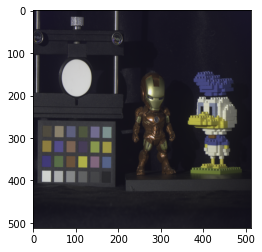

In [32]:
#sample = next(iter(train_ds))

#im = np.expand_dims(sample[0,...], axis = 0)


#@markdown modo al que le entendí de Brayan
def spec2rgbcie(im, CMF):  
  (m,n,la) = np.shape(im)[1:]
  X = np.reshape(im, (1, m*n, la))
  X = np.transpose(X, [0, 2, 1])
  CMF = CMF/np.sum(CMF, axis = 0)
  rgb = (CMF.T @ X)
  rgb = np.reshape(rgb.T, (1, m, n, 3))
  
  return rgb


CMF = sio.loadmat("./data/CMF.mat")["C"]

rgb = spec2rgbcie(im, CMF)
print( "minimo",np.min(im))
print( "maximo",np.max(im))
plt.imshow(np.power(rgb[0,:,:,:], 0.5))

print('\n\n',rgb[0, 0,0])

[0.02421507 0.01969027 0.02406184]


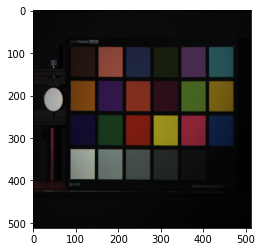

In [ ]:
#@markdown lo que con un promedio en un rango

def spec2rgb(x):
  (m,n, la) = np.shape(im)[1:]
  rgb = np.zeros((1, m, n, 3))
  rango = int(np.round(la/3))

  rgb[0, : , : , 2] = np.mean(x[0, :, :, 0:rango], axis = 2)
  rgb[0, : , : , 1] = np.mean(x[0, :, :, rango: 2*rango], axis = 2)
  rgb[0, : , : , 0] = np.mean(x[0, :, :, 2*rango:], axis = 2)
  return rgb


rgbp = spec2rgb(im)

print(rgbp[0, 0, 0, :])
plt.imshow(rgbp[0])

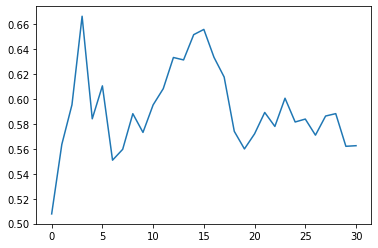

In [ ]:

(m,n,la) = np.shape(im)[1:]
#m = np.shape(im)[1]
#n = np.shape(im)[2]
#la = np.shape(im)[3]

X = np.reshape(im, (1, m*n, la))
X = np.transpose(X, [0, 2, 1])

#plt.plot(X[0, :, 20000])
plt.show()

#plt.imshow(rgb[0,:,:,:])
#plt.scatter(120, 350)
plt.plot(im[0,350, 120,:])


[[0.72970489 0.75659206]
 [0.56407352 0.58455206]
 [1.31777157 1.37780002]] 
, 

[[0.27941448 0.27826686]
 [0.21599185 0.2149923 ]
 [0.50459366 0.50674083]]
0.0
1.0


 [0.35582151 0.33047885 0.67154482]


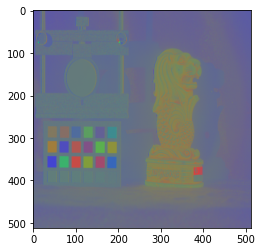

In [ ]:
#@markdown modo de la página web
def spec2rgbcie(im, CMF):  
  (m,n,la) = np.shape(im)[1:]
  delta = (700 - 400)/(la-1)
  X = np.reshape(im, (1, m*n, la))
  X = np.transpose(X, [0, 2, 1])

  XYZ = delta*(CMF.T @ X)
  xyz = XYZ/np.sum(XYZ, axis = 1)
  print(XYZ[0, :, 0:2], "\n, \n")
  print(xyz[0, :, 0:2])
  xr, yr, xg, yg, xb, yb  = 0.630,	0.340,	0.310,	0.595,	0.155,	0.070
  coef = np.array([[xr , xg, xb],
                  [yr, yg, yb],
                  [1-(xr + yr), 1-(xg + yg), 1-(xb + yb)]])
  coef = np.linalg.inv(coef)
  rgb = coef @ xyz
  rgb = np.reshape(rgb.T, (1, m, n, 3))
  return rgb


CMF = sio.loadmat("./data/CMF.mat")["C"]

rgb = spec2rgbcie(im, CMF)
w = -np.min(rgb)
rgb += w

rgb /= np.max(rgb)

print(np.min(rgb))
print(np.max(rgb))

plt.imshow(rgb[0,:,:,:])

print('\n\n',rgb[0, 0,0])

0.17080317298146525
0.0


 [0.00738401 0.00558877 0.01790912]


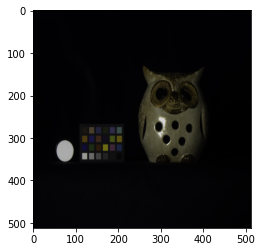

In [20]:
#@markdown modo al que le entendí de Brayan
def spec2rgbcie(im, CMF):  
  (m,n,la) = np.shape(im)[1:]
  delta = (720 - 420)/(la-1)
  X = np.reshape(im, (1, m*n, la))
  X = np.transpose(X, [0, 2, 1])
  CMF = CMF/np.sum(CMF, axis = 0)
  rgb = (CMF.T @ X)
  rgb = np.reshape(rgb.T, (1, m, n, 3))

  print(np.max(CMF))
  print(np.min(CMF))
  return rgb


CMF = sio.loadmat("./data/CMF.mat")["C"]

rgb = spec2rgbcie(im, CMF)


plt.imshow(rgb[0,:,:,:])

print('\n\n',rgb[0, 0,0])

0.16638811687823932
0.0


 [0.02258058 0.02072703 0.02279784]


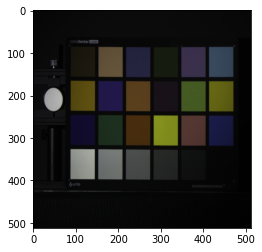

In [ ]:
#@markdown modo al que le entendí de Brayan
def spec2rgbcie(im, CMF):  
  (m,n,la) = np.shape(im)[1:]
  delta = (700 - 400)/(la-1)
  X = np.reshape(im, (1, m*n, la))
  X = np.transpose(X, [0, 2, 1])
  CMF = CMF/np.sum(CMF, axis = 0)
  rgb = (CMF.T @ X)
  #xyz = XYZ/np.sum(XYZ, axis = 1)
  #print(XYZ[0, :, 0:2], "\n, \n")
  #print(xyz[0, :, 0:2])
  #xr, yr, xg, yg, xb, yb  = 0.630,	0.340,	0.310,	0.595,	0.155,	0.070
  #coef = np.array([[xr , xg, xb],
  #                [yr, yg, yb],
  #                [1-(xr + yr), 1-(xg + yg), 1-(xb + yb)]])
  #coef = np.linalg.inv(coef)
  #rgb = coef @ xyz
  rgb = np.reshape(rgb.T, (1, m, n, 3))

  print(np.max(CMF))
  print(np.min(CMF))
  return rgb


CMF = sio.loadmat("./data/CMF.mat")["C"]

rgb = spec2rgbcie(im, CMF)


plt.imshow(rgb[0,:,:,:])

print('\n\n',rgb[0, 0,0])

In [ ]:
a_optimizer = tf.keras.optimizers.Adam(1e-3)
d_optimizer = tf.keras.optimizers.Adam(1e-3)

FACTOR = [ 1 , 1 , 1/2 , 1/2 , 1/4, 1/8]
features= 64

encoder = make_encoder(input_shape, features=features, factors=FACTOR)
generator = make_generator(input_shape, features=features, factors=FACTOR)
discriminator = make_discriminator(input_shape)

In [ ]:
encoder.summary()
generator.summary()
discriminator.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 31)]    0         
_________________________________________________________________
encoder (Encoder)            (None, 512, 512, 8)       59184     
Total params: 59,184
Trainable params: 59,184
Non-trainable params: 0
_________________________________________________________________
Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 8)]     0         
_________________________________________________________________
generator (Generator)        (None, 512, 512, 31)      59230     
Total params: 59,230
Trainable params: 59,230
Non-trainable params: 0
_________________________________________________________________
Model: "discriminator"
_________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = spectralGAN(encoder=encoder, generator=generator, discriminator=discriminator)

model.compile(
    a_optimizer = a_optimizer,
    d_optimizer = d_optimizer,
    a_loss = autoencoder_loss,
    d_loss = discriminator_loss,
    metrics = [ PSNR() ]
)


callbacks = [
             ModelCheckpoint( 'geison_spectralGAN.h5', monitor='val_psnr',  verbose=1,  save_best_only=True,  save_weights_only=True,  mode="max", )
]


In [ ]:
# model.load_weights('spectralGAN.h5')

In [ ]:
model.fit(train_ds, epochs=300, validation_data=test_ds, callbacks=callbacks)

Epoch 1/300
9/9 [==============================] - 93s 2s/step - a_loss: 0.0136 - d_loss: 1.2840 - psnr: 19.5974 - real_acc: 0.9634 - fake_acc: 0.3828 - val_a_loss: 0.0108 - val_d_loss: 1.3783 - val_psnr: 19.9859 - val_real_acc: 0.1267 - val_fake_acc: 1.0000

Epoch 00001: val_psnr improved from -inf to 19.98588, saving model to spectralGAN.h5
Epoch 2/300
9/9 [==============================] - 9s 1s/step - a_loss: 0.0076 - d_loss: 1.0075 - psnr: 21.6531 - real_acc: 0.9786 - fake_acc: 0.9353 - val_a_loss: 0.0062 - val_d_loss: 1.3586 - val_psnr: 22.3294 - val_real_acc: 0.1660 - val_fake_acc: 1.0000

Epoch 00002: val_psnr improved from 19.98588 to 22.32941, saving model to spectralGAN.h5
Epoch 3/300
9/9 [==============================] - 9s 1s/step - a_loss: 0.0044 - d_loss: 1.0947 - psnr: 24.4129 - real_acc: 0.7832 - fake_acc: 0.8382 - val_a_loss: 0.0035 - val_d_loss: 1.3907 - val_psnr: 24.7933 - val_real_acc: 4.3400e-04 - val_fake_acc: 1.0000

Epoch 00003: val_psnr improved from 22.32941

In [ ]:
#model.save_weights('geison_spectralGAN.h5')

In [ ]:
model.summary()

Model: "spectral_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 512, 512, 8)       59184     
_________________________________________________________________
generator (Functional)       (None, 512, 512, 31)      59230     
_________________________________________________________________
sequential (Sequential)      (None, 512, 512, 31)      118414    
_________________________________________________________________
discriminator (Functional)   (None, 127, 127, 1)       41985     
Total params: 160,399
Trainable params: 160,143
Non-trainable params: 256
_________________________________________________________________


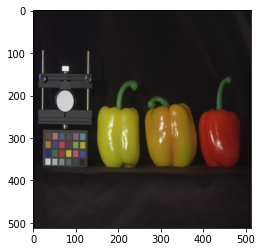

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


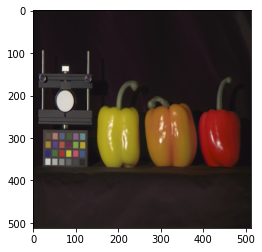

In [ ]:
sample = next(iter(test_ds)).numpy()
generated = model.autoencoder.predict(sample)

num = 0
RGB = [ 24, 15 , 5]

x_true = np.power( sample, 0.5 )
x_pred = np.power( generated, 0.5 )

plt.imshow(x_true[num][:,:,RGB])
plt.show()

plt.imshow(x_pred[num][:,:,RGB])
plt.show()


In [ ]:
model.summary()

Model: "spectral_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 512, 512, 8)       59184     
_________________________________________________________________
generator (Functional)       (None, 512, 512, 31)      59230     
_________________________________________________________________
sequential (Sequential)      (None, 512, 512, 31)      118414    
_________________________________________________________________
discriminator (Functional)   (None, 127, 127, 1)       41985     
Total params: 160,399
Trainable params: 160,143
Non-trainable params: 256
_________________________________________________________________
